In [21]:
import torch
from regression import *

torch.manual_seed(42)
# using Apple Metal GPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# creating dataset (with two features)
data = torch.randn(30, 1, device=device, requires_grad=False)
y = torch.randn(30, 1, device=device, requires_grad=False)

# Define true weights and bias
true_weights = torch.randn(1, 1, device=device)
true_bias = torch.randn(1, device=device)

# Create y using a linear function
y = data @ true_weights + true_bias
X, X_val = data[:20], data[20:]
y, y_val = y[:20], y[20:]

print(f"X shape: {X.shape}")
print(f"length of X: {len(X)}")
print(f"y shape: {y.shape}")
print(f"length of y: {len(y)}")

X shape: torch.Size([20, 1])
length of X: 20
y shape: torch.Size([20, 1])
length of y: 20


model state_dict: OrderedDict({'w': tensor([[0.3367]], device='mps:0'), 'b': tensor([0.], device='mps:0')})
model parameters: [Parameter containing:
tensor([[0.3367]], device='mps:0', requires_grad=True), Parameter containing:
tensor([0.], device='mps:0', requires_grad=True)]


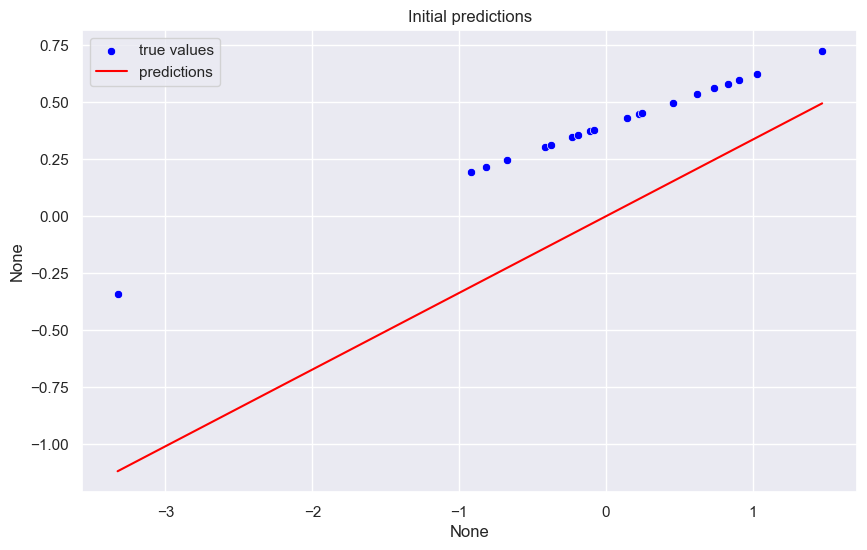

In [22]:
# Instantiate the model
model = LinearRegressorBasic(1, 1).to(device)
print(f"model state_dict: {model.state_dict()}")
print(f"model parameters: {list(model.parameters())}")
with torch.inference_mode():
    y_pred = model(X)

# print(f"Predictions: {y_pred}")
plot_predictions(X.cpu(), y.cpu(), y_pred.cpu(), "Initial predictions")

Epoch 0, train loss: 0.17258821427822113, val loss: 0.07669541984796524
Epoch 1, train loss: 0.1098513975739479, val loss: 0.04903260990977287
Epoch 2, train loss: 0.06992270052433014, val loss: 0.031350571662187576
Epoch 3, train loss: 0.0445091538131237, val loss: 0.020047081634402275
Epoch 4, train loss: 0.028333455324172974, val loss: 0.012820439413189888
Epoch 5, train loss: 0.018037207424640656, val loss: 0.008199764415621758
Epoch 6, train loss: 0.01148310024291277, val loss: 0.005245022010058165
Epoch 7, train loss: 0.0073108794167637825, val loss: 0.0033553719986230135
Epoch 8, train loss: 0.004654798191040754, val loss: 0.002146756276488304
Epoch 9, train loss: 0.002963833976536989, val loss: 0.001373644219711423
Epoch 10, train loss: 0.0018872481305152178, val loss: 0.0008790536085143685
Epoch 11, train loss: 0.0012017848202958703, val loss: 0.0005626088241115212
Epoch 12, train loss: 0.0007653271313756704, val loss: 0.00036012197961099446
Epoch 13, train loss: 0.00048740772

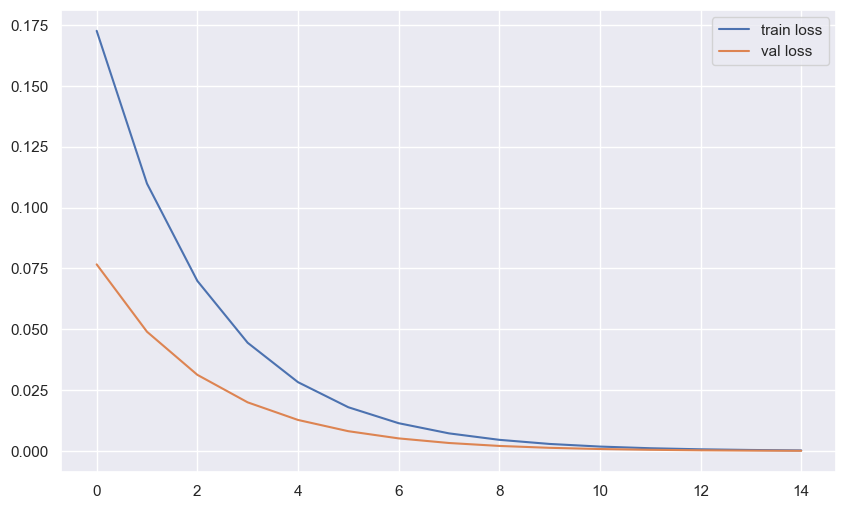

In [23]:
# Train the modelfrom regression import train_model, plot_loss

train_losses, val_losses = train_model(model, X, y, X_val, y_val, epochs=15, lr=0.1)
plot_losses(train_losses, val_losses)

model state_dict: OrderedDict({'w': tensor([[0.2255]], device='mps:0'), 'b': tensor([0.3834], device='mps:0')})
model parameters: [Parameter containing:
tensor([[0.2255]], device='mps:0', requires_grad=True), Parameter containing:
tensor([0.3834], device='mps:0', requires_grad=True)]
True weights: tensor([[0.2223]], device='mps:0')


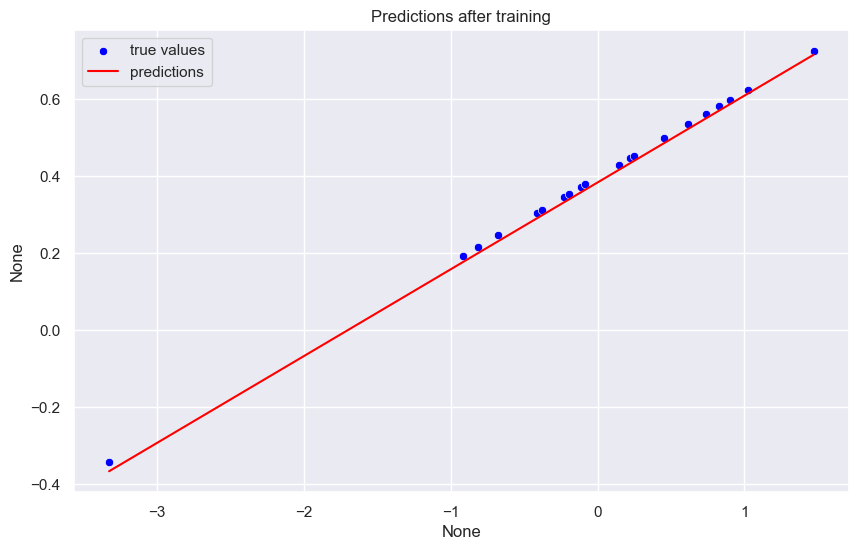

In [24]:
# learned weights and bias
print(f"model state_dict: {model.state_dict()}")
print(f"model parameters: {list(model.parameters())}")

# actual weights and bias
print(f"True weights: {true_weights}")
with torch.inference_mode():
    predictions_after_training = model(X)
plot_predictions(X.cpu(), y.cpu(), predictions_after_training.cpu(), "Predictions after training")